In [1]:
import numpy as np
import pandas as pd
import warnings

In [2]:
df_product_category= pd.read_csv('product_category_name_translation.csv')
df_sellers = pd.read_csv('olist_sellers_dataset.csv')
df_product = pd.read_csv('olist_products_dataset.csv')
df_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
df_payments = pd.read_csv('olist_order_payments_dataset.csv')
df_items = pd.read_csv('olist_order_items_dataset.csv')
df_geolocation = pd.read_csv('olist_geolocation_dataset.csv')
df_customers = pd.read_csv('olist_customers_dataset.csv')
df_orders = pd.read_csv('olist_orders_dataset.csv')

In [3]:
print(df_product_category.info())
print(df_sellers.info())
print(df_product.info())
print(df_reviews.info())
print(df_payments.info())
print(df_items.info())
print(df_geolocation.info())
print(df_customers.info())
print(df_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      No

In [4]:
print(df_product_category.columns)
print(df_sellers.columns)
print(df_product.columns)
print(df_reviews.columns)
print(df_payments.columns)
print(df_items.columns)
print(df_geolocation.columns)
print(df_customers.columns)
print(df_orders.columns)

Index(['product_category_name', 'product_category_name_english'], dtype='object')
Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')
Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')
Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')
Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')
Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')
Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
   

C:\Users\smlma\AppData\Local\Temp\ipykernel_31860\1530288933.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='seller_state', y='count', data=seller_distribution, palette='viridis')


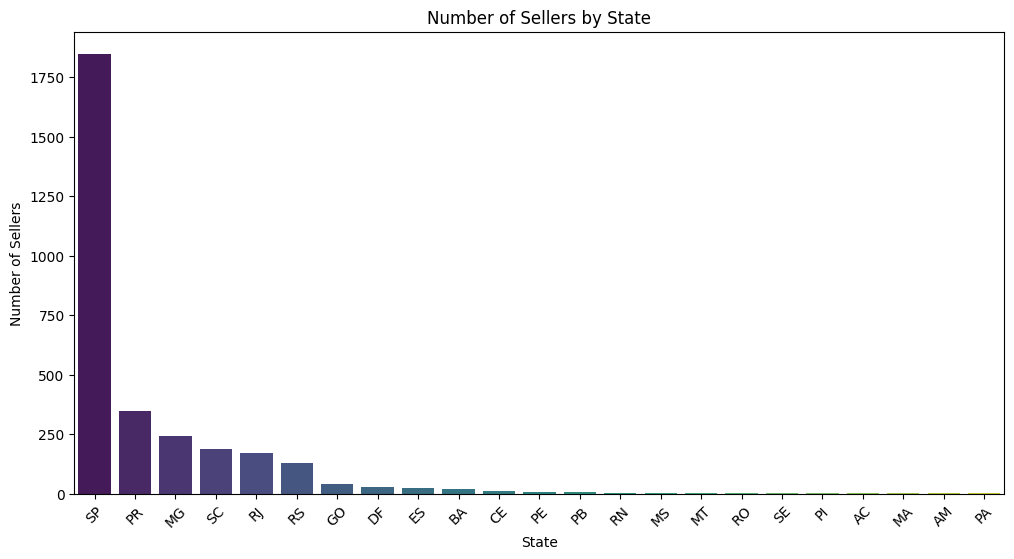

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
# Analyze the geographic distribution of sellers and their concentration in different states/cities.
#  Count the number of sellers per state.
# Visualization: A bar plot showing the number of sellers in each state
seller_distribution = df_sellers['seller_state'].value_counts().reset_index()
seller_distribution.columns = ['seller_state', 'count']

plt.figure(figsize=(12, 6))
sns.barplot(x='seller_state', y='count', data=seller_distribution, palette='viridis')
plt.title('Number of Sellers by State')
plt.xlabel('State')
plt.ylabel('Number of Sellers')
plt.xticks(rotation=45)
plt.show()


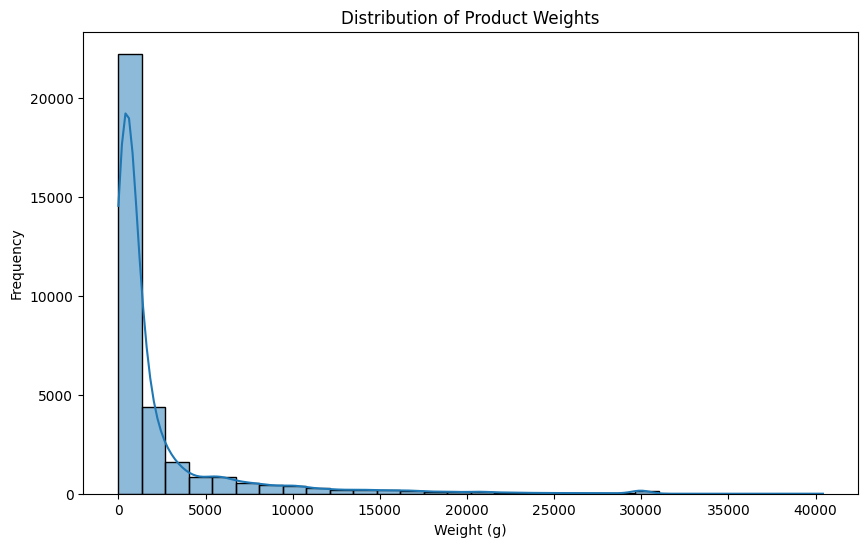

In [36]:
# Objective: Understand product characteristics like dimensions, weight, and category popularity.
# Analysis:
# Product Dimensions: Analyze product dimensions and weight.
# Missing Values: Identify products with missing values in the critical fields.
# Visualization: Use histograms to visualize the distribution of product dimensions.
plt.figure(figsize=(10, 6))
sns.histplot(df_product['product_weight_g'].dropna(), bins=30, kde=True)
plt.title('Distribution of Product Weights')
plt.xlabel('Weight (g)')
plt.ylabel('Frequency')
plt.show()


C:\Users\smlma\AppData\Local\Temp\ipykernel_31860\926056986.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_state', y='count', data=customer_distribution, palette='magma')


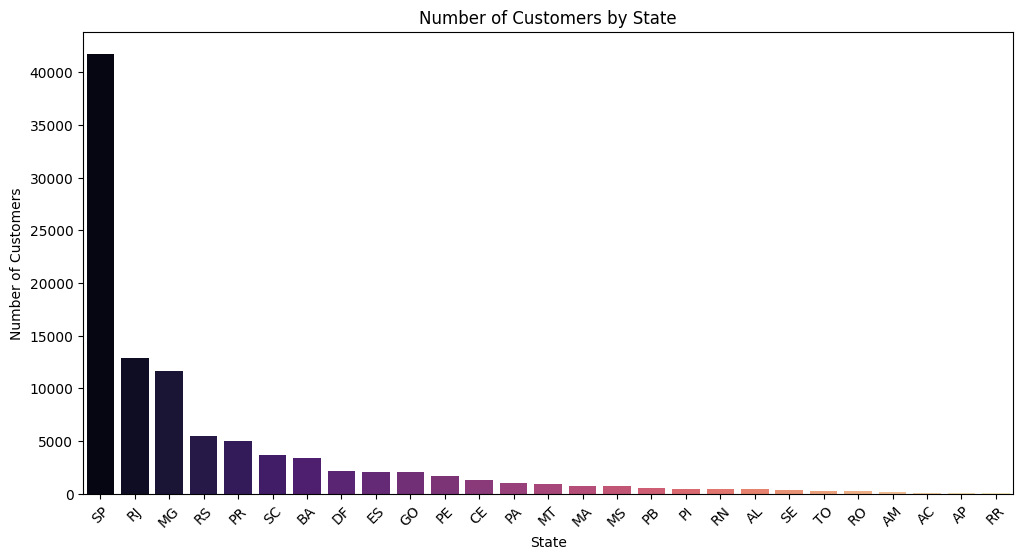

In [37]:
# Objective: Analyze customer distribution, demographics, and concentration.
# Analysis:
# Customer Distribution by City/State: Identify which regions have the highest number of customers.
# Unique Customers: Count the number of unique customers using customer_unique_id.
# Visualization: A heatmap or bar plot showing the number of customers in different states
customer_distribution = df_customers['customer_state'].value_counts().reset_index()
customer_distribution.columns = ['customer_state', 'count']

plt.figure(figsize=(12, 6))
sns.barplot(x='customer_state', y='count', data=customer_distribution, palette='magma')
plt.title('Number of Customers by State')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


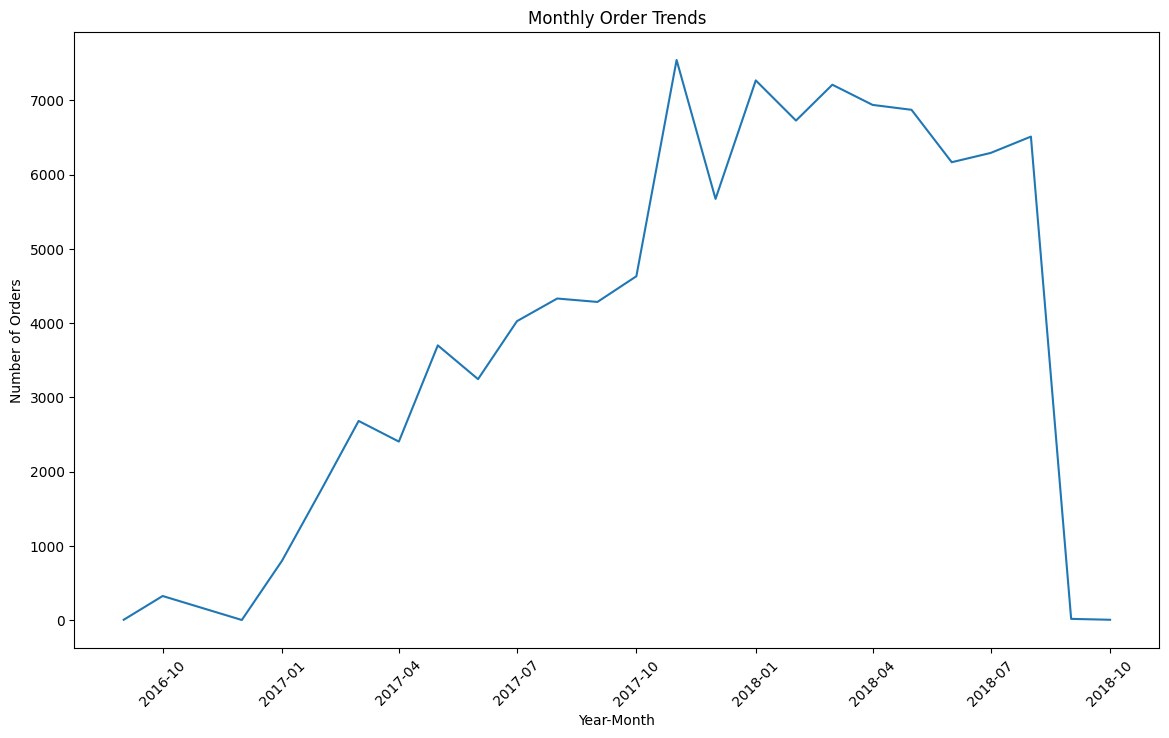

In [38]:
# Assuming df_orders['order_purchase_timestamp'] is already a datetime object.
# If not, you need to convert it first:
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])

# Create a new column for year-month
df_orders['year_month'] = df_orders['order_purchase_timestamp'].dt.to_period('M').astype(str)

# Group by year-month and count orders
orders_by_month = df_orders.groupby('year_month').size().reset_index(name='count')

# Convert 'year_month' back to a datetime format for plotting
orders_by_month['year_month'] = pd.to_datetime(orders_by_month['year_month'])

# Plot using Seaborn
plt.figure(figsize=(14, 8))
sns.lineplot(x='year_month', y='count', data=orders_by_month)
plt.title('Monthly Order Trends')
plt.xlabel('Year-Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [13]:
df_orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date            object
year_month                               object
dtype: object

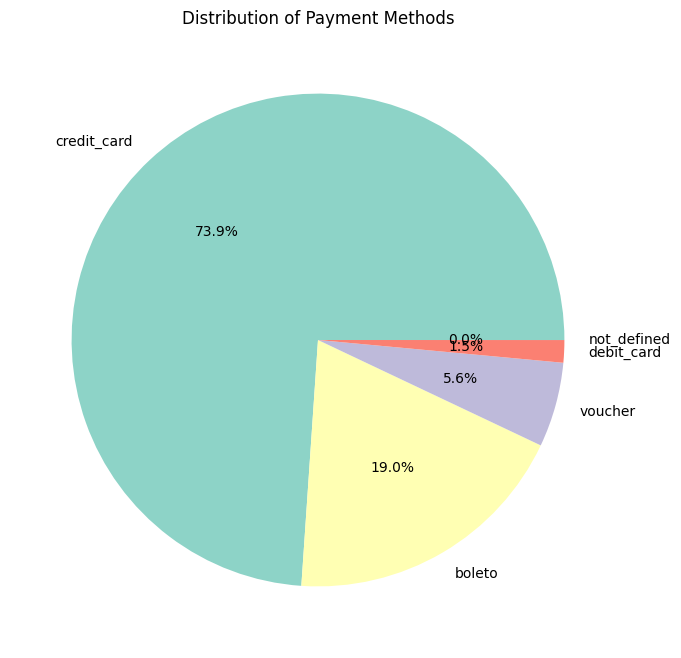

In [39]:
# Objective: Understand payment methods and transaction amounts.
# Analysis:
# Payment Method Popularity: Analyze which payment methods are most commonly used.
# Payment Amounts: Distribution of transaction amounts.
# Visualization: Pie chart for payment method distribution, histogram for payment values.
payment_methods = df_payments['payment_type'].value_counts().reset_index()
payment_methods.columns = ['payment_type', 'count']

plt.figure(figsize=(8, 8))
plt.pie(payment_methods['count'], labels=payment_methods['payment_type'], autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Distribution of Payment Methods')
plt.show()


C:\Users\smlma\AppData\Local\Temp\ipykernel_31860\985613703.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='review_score', data=df_reviews, palette='coolwarm')


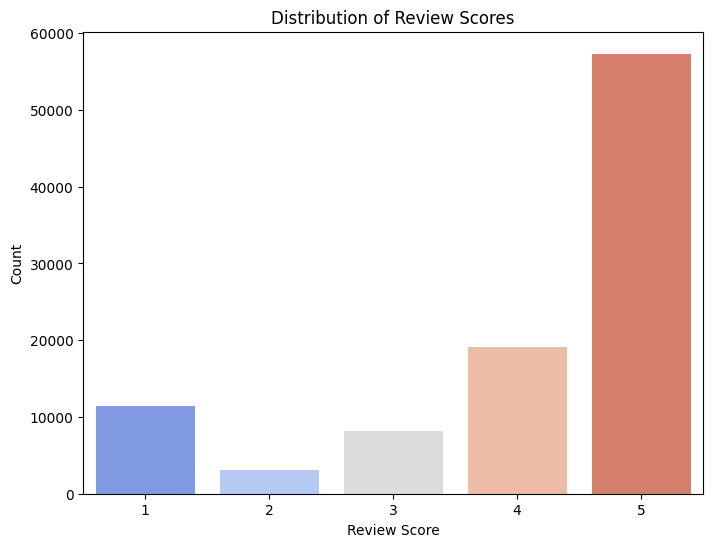

In [40]:
# Objective: Analyze customer feedback and ratings.
# Analysis:
# Review Scores: Distribution of review scores.
# Review Comments: Frequency of review comments and their sentiment analysis (if applicable).
# Visualization: Bar plot for review scores
plt.figure(figsize=(8, 6))
sns.countplot(x='review_score', data=df_reviews, palette='coolwarm')
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.show()


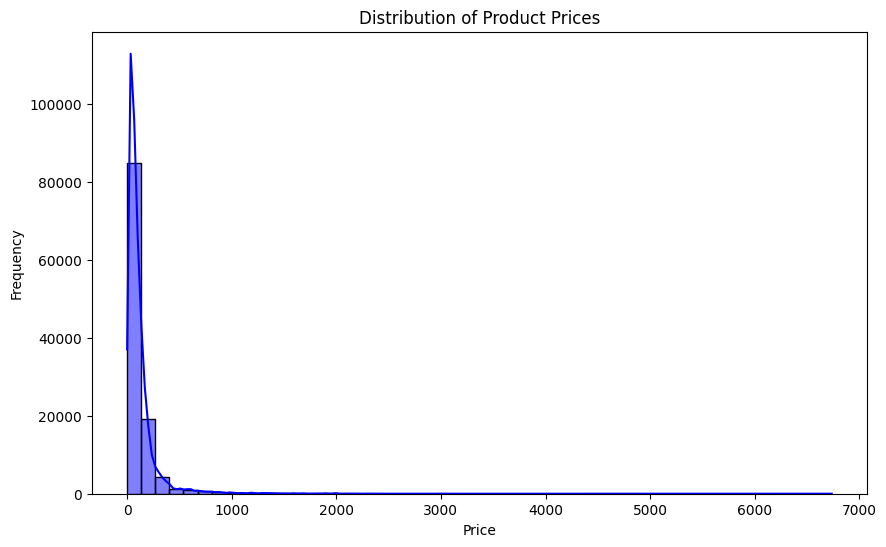

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(df_items['price'], bins=50, kde=True, color='blue')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


C:\Users\smlma\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


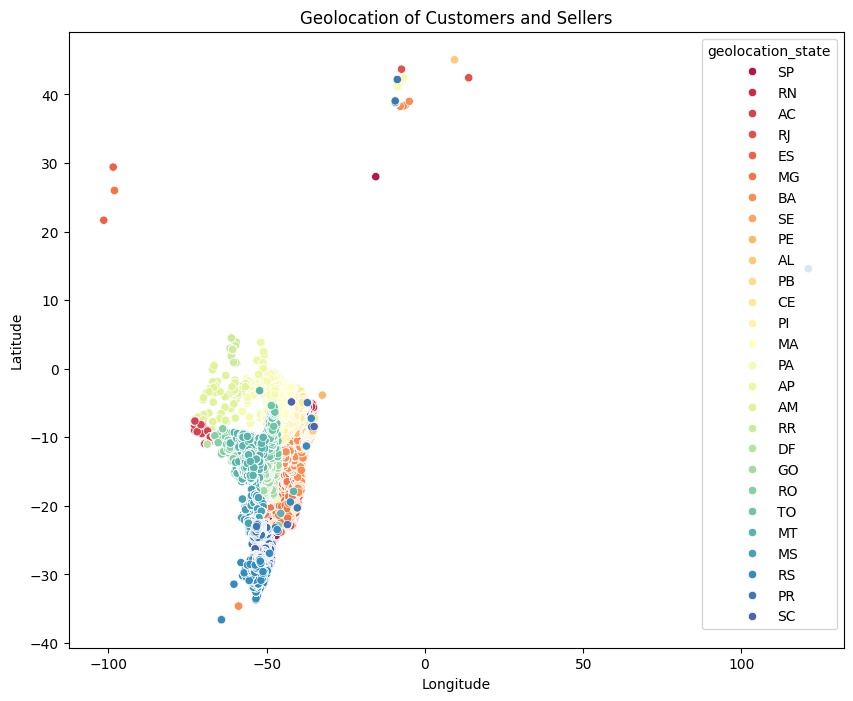

In [42]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='geolocation_lng', y='geolocation_lat', data=df_geolocation, hue='geolocation_state', palette='Spectral')
plt.title('Geolocation of Customers and Sellers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


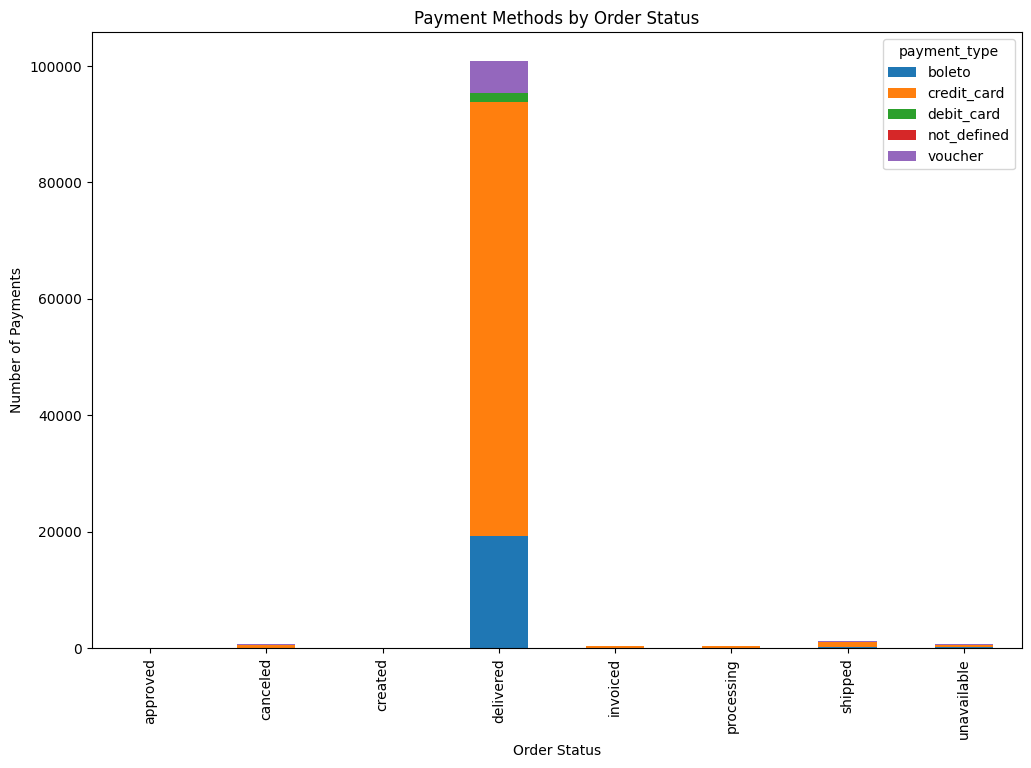

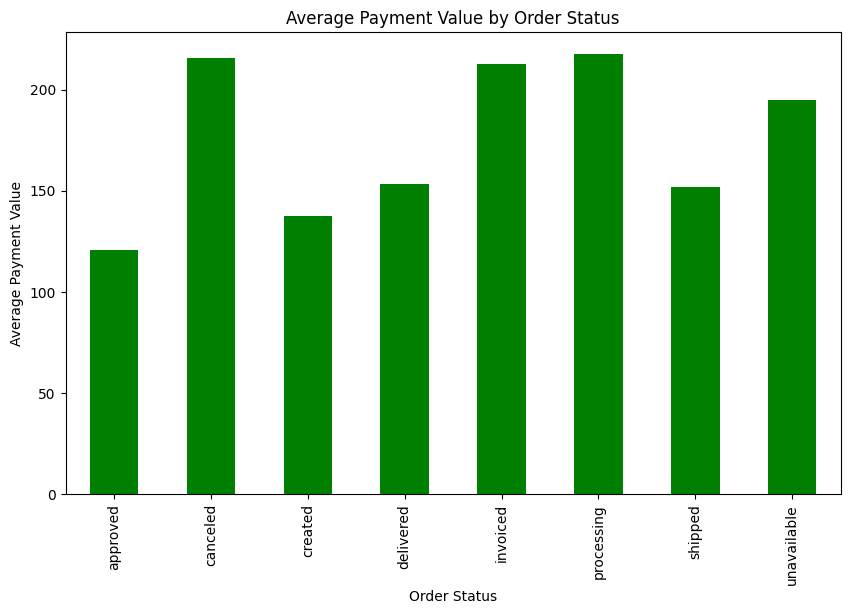

In [43]:
#Datasets: df_orders and df_payments
# Objective: Understand the relationship between order status and payment behavior, including payment methods and amounts.
df_order_payment = pd.merge(df_orders, df_payments, on='order_id', how='inner')

# Insight: Analyze the distribution of payment methods by order status
payment_by_status = df_order_payment.groupby(['order_status', 'payment_type']).size().unstack().fillna(0)

# Visualization
payment_by_status.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Payment Methods by Order Status')
plt.xlabel('Order Status')
plt.ylabel('Number of Payments')
plt.show()

# Insight: Average payment value by order status
avg_payment_value = df_order_payment.groupby('order_status')['payment_value'].mean()

# Visualization
avg_payment_value.plot(kind='bar', color='green', figsize=(10, 6))
plt.title('Average Payment Value by Order Status')
plt.xlabel('Order Status')
plt.ylabel('Average Payment Value')
plt.show()


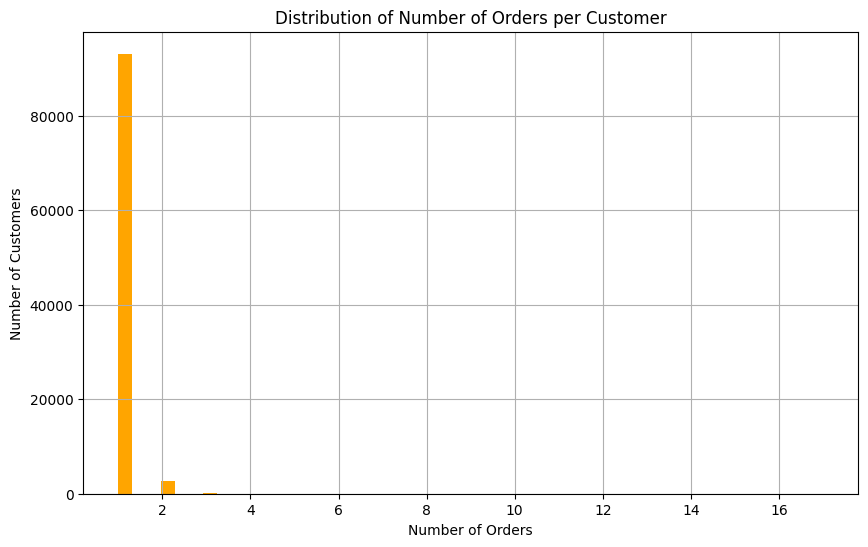

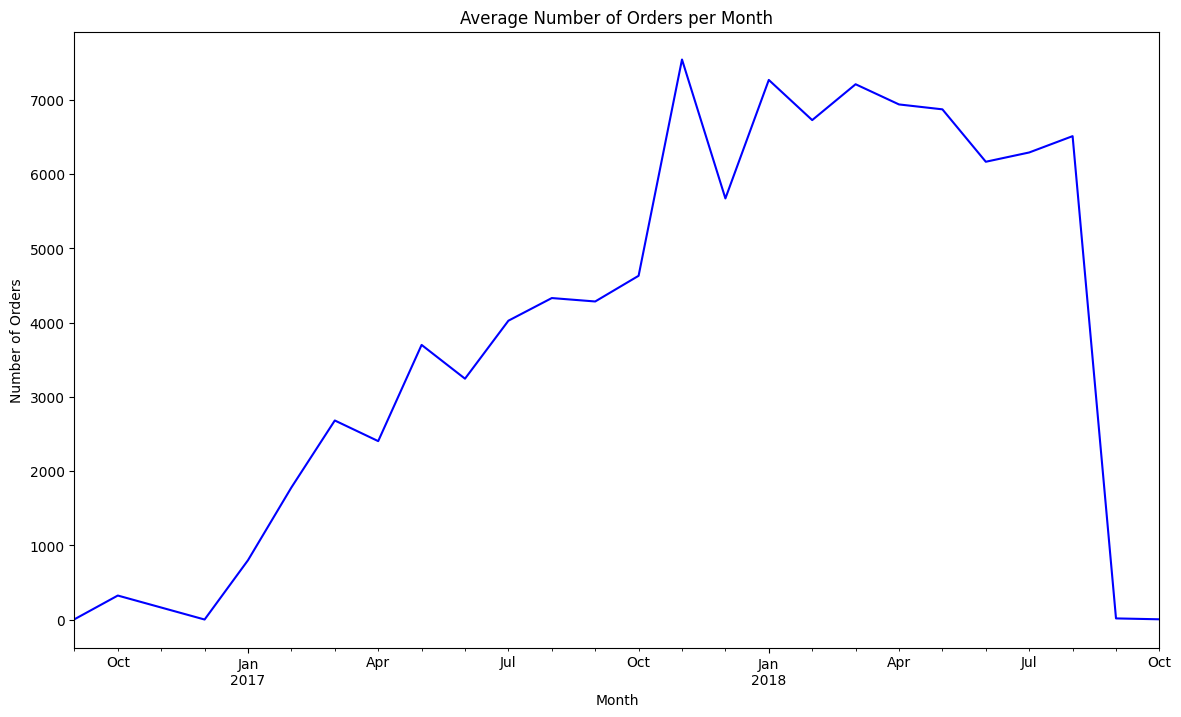

In [44]:
df_customer_orders = pd.merge(df_customers, df_orders, on='customer_id', how='inner')

# Insight: Number of orders per customer
orders_per_customer = df_customer_orders['customer_unique_id'].value_counts()

# Visualization
orders_per_customer.hist(bins=50, figsize=(10, 6), color='orange')
plt.title('Distribution of Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()

# Insight: Average order value per customer over time
df_customer_orders['order_purchase_timestamp'] = pd.to_datetime(df_customer_orders['order_purchase_timestamp'])
avg_order_value_time = df_customer_orders.groupby(df_customer_orders['order_purchase_timestamp'].dt.to_period('M'))['order_purchase_timestamp'].size()

# Visualization
avg_order_value_time.plot(kind='line', figsize=(14, 8), color='blue')
plt.title('Average Number of Orders per Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.show()


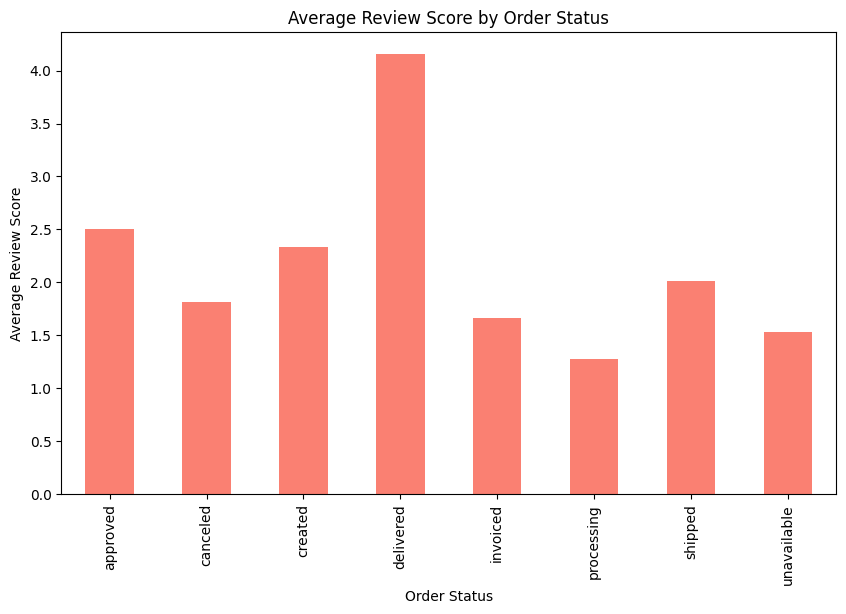

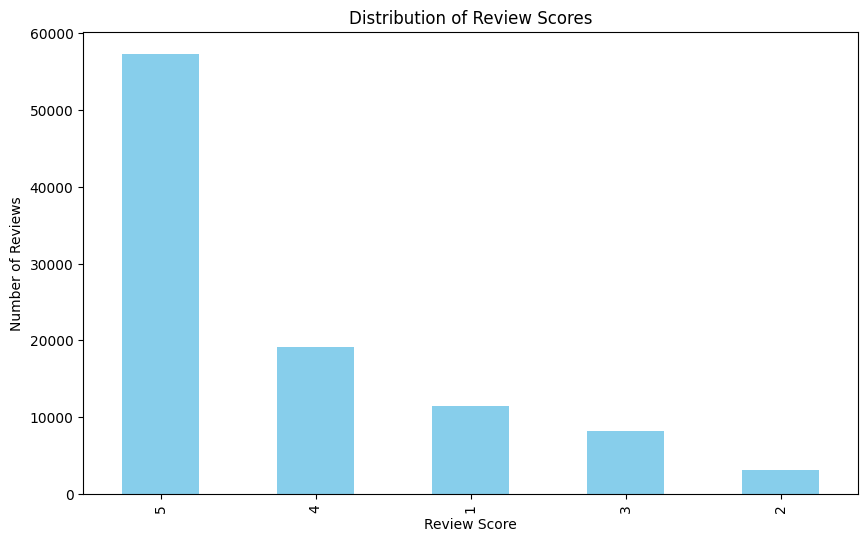

In [45]:
df_order_reviews = pd.merge(df_orders, df_reviews, on='order_id', how='inner')

# Insight: Average review score by order status
avg_review_score_status = df_order_reviews.groupby('order_status')['review_score'].mean()

# Visualization
avg_review_score_status.plot(kind='bar', color='salmon', figsize=(10, 6))
plt.title('Average Review Score by Order Status')
plt.xlabel('Order Status')
plt.ylabel('Average Review Score')
plt.show()

# Insight: Distribution of review scores
review_score_distribution = df_order_reviews['review_score'].value_counts()

# Visualization
review_score_distribution.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Number of Reviews')
plt.show()


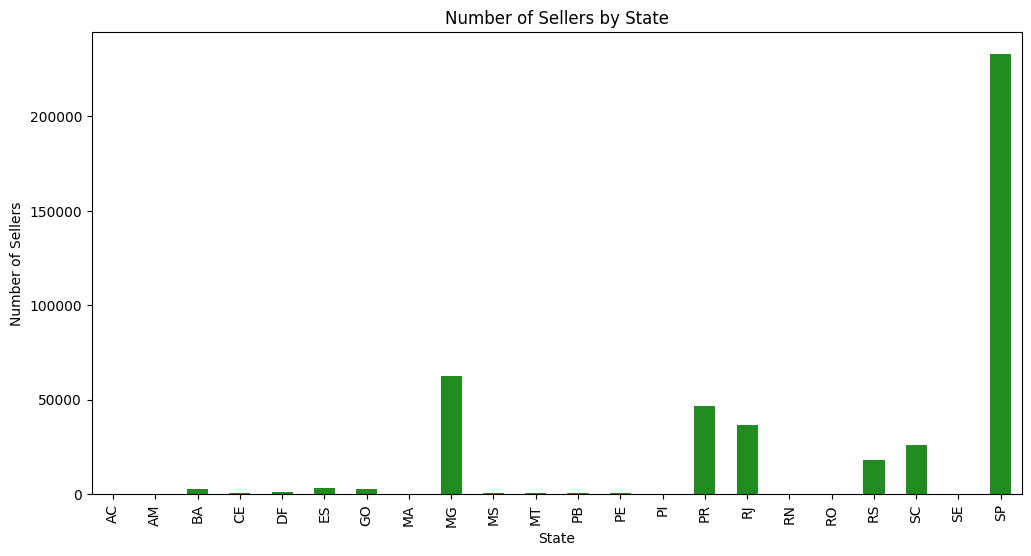

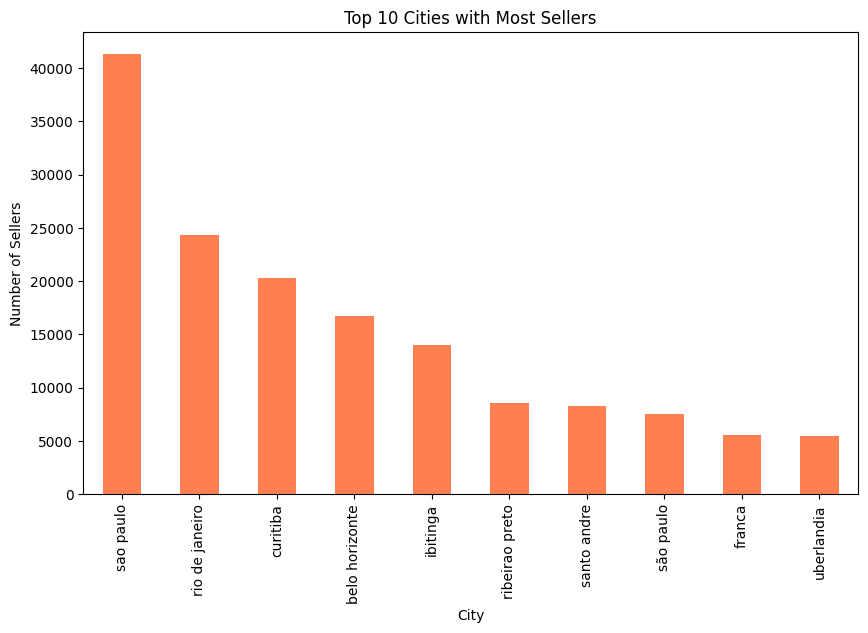

In [46]:
df_seller_geo = pd.merge(df_sellers, df_geolocation, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')

# Insight: Geographic distribution of sellers
seller_geo_distribution = df_seller_geo.groupby('geolocation_state').size()

# Visualization
seller_geo_distribution.plot(kind='bar', color='forestgreen', figsize=(12, 6))
plt.title('Number of Sellers by State')
plt.xlabel('State')
plt.ylabel('Number of Sellers')
plt.show()

# Insight: Seller concentration in top cities
seller_city_distribution = df_seller_geo['geolocation_city'].value_counts().head(10)

# Visualization
seller_city_distribution.plot(kind='bar', color='coral', figsize=(10, 6))
plt.title('Top 10 Cities with Most Sellers')
plt.xlabel('City')
plt.ylabel('Number of Sellers')
plt.show()


In [47]:
# Merge df_orders with df_payments on 'order_id'
df_orders_payments = pd.merge(df_orders, df_payments, on='order_id')

# Merge the above result with df_items to include product and seller information
df_merged = pd.merge(df_orders_payments, df_items, on='order_id')

# Convert relevant columns to datetime
df_merged['order_purchase_timestamp'] = pd.to_datetime(df_merged['order_purchase_timestamp'])
df_merged['shipping_limit_date'] = pd.to_datetime(df_merged['shipping_limit_date'])


In [48]:
# Extract year and month from the purchase timestamp
df_merged['year'] = df_merged['order_purchase_timestamp'].dt.year
df_merged['month'] = df_merged['order_purchase_timestamp'].dt.month


In [49]:
# Group by year and order status to count occurrences
order_status_by_year = df_merged.groupby(['year', 'order_status']).size().unstack().fillna(0)

# Group by year and payment type to see payment behavior
payment_behavior_by_year = df_merged.groupby(['year', 'payment_type']).size().unstack().fillna(0)


In [50]:
# Group by year and month to get the count of orders
monthly_sales = df_merged.groupby(['year', 'month']).size().unstack().fillna(0)

# Find the month with the highest number of orders for each year
highest_orders_month = monthly_sales.idxmax(axis=1)


In [51]:
# Merge df_merged with df_product to get the product category
df_merged = pd.merge(df_merged, df_product, on='product_id', how='left')
df_merged = pd.merge(df_merged, df_product_category, on='product_category_name', how='left')
# Group by year and product category to find the number of products sold
category_sales_by_year = df_merged.groupby(['year', 'product_category_name_english']).size().unstack().fillna(0)

# Find the top-selling category for each year
top_selling_category_by_year = category_sales_by_year.idxmax(axis=1)


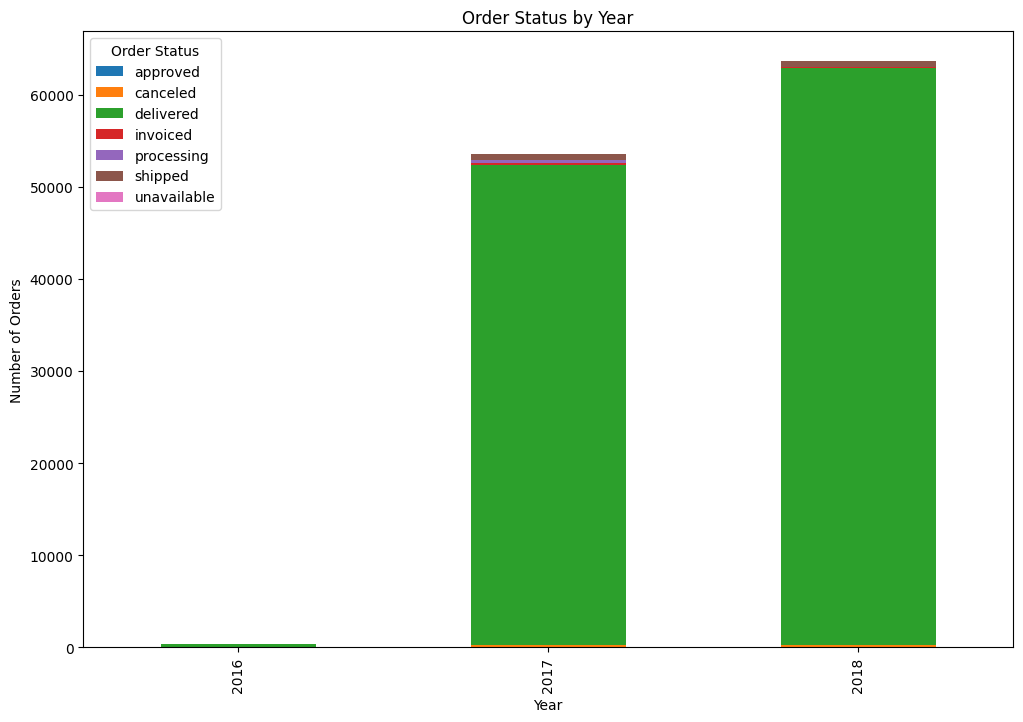

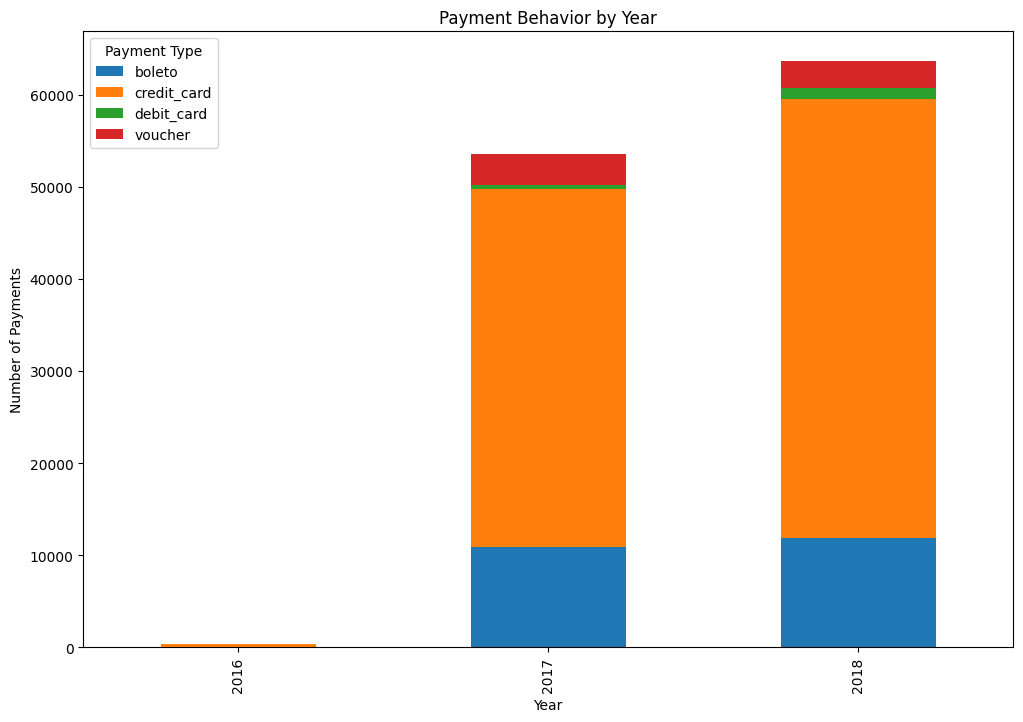

In [52]:
import matplotlib.pyplot as plt

# Plot order status by year
order_status_by_year.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Order Status by Year')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.legend(title='Order Status')
plt.show()

# Plot payment behavior by year
payment_behavior_by_year.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Payment Behavior by Year')
plt.xlabel('Year')
plt.ylabel('Number of Payments')
plt.legend(title='Payment Type')
plt.show()


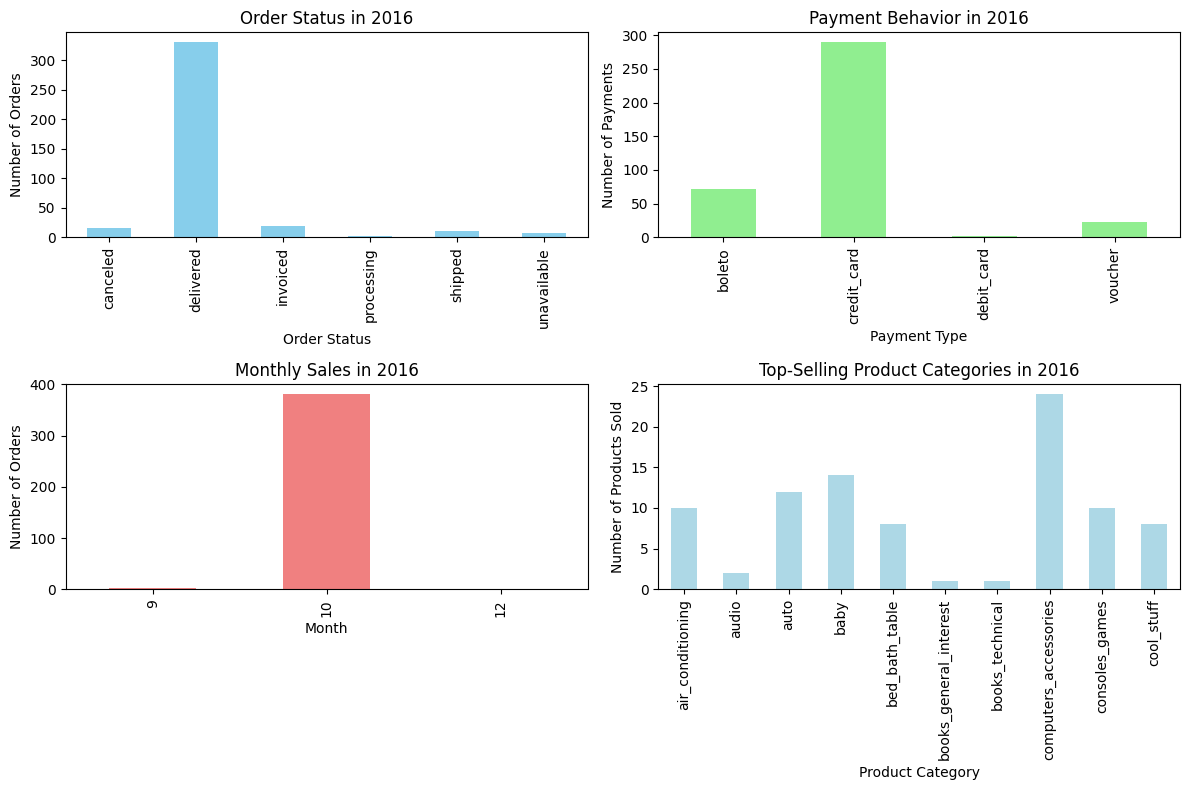

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a function that takes a specific year and generates visualizations
def analyze_yearly_data(year, df_orders, df_payments, df_items, df_product,df_product_category):
    # Step 1: Merge the datasets
    df_orders_payments = pd.merge(df_orders, df_payments, on='order_id')
    df_merged = pd.merge(df_orders_payments, df_items, on='order_id')
    df_merged = pd.merge(df_merged, df_product, on='product_id', how='left')
    df_merged = pd.merge(df_merged, df_product_category, on='product_category_name', how='left')

    # Step 2: Convert columns to datetime and extract year and month
    df_merged['order_purchase_timestamp'] = pd.to_datetime(df_merged['order_purchase_timestamp'])
    df_merged['year'] = df_merged['order_purchase_timestamp'].dt.year
    df_merged['month'] = df_merged['order_purchase_timestamp'].dt.month

    # Step 3: Filter the data for the specified year
    df_year = df_merged[df_merged['year'] == year]

    # Step 4: Analyze Order Status and Payment Behavior
    order_status_by_year = df_year.groupby(['order_status']).size()
    payment_behavior_by_year = df_year.groupby(['payment_type']).size()

    # Step 5: Analyze Monthly Sales Trends
    monthly_sales = df_year.groupby('month').size()

    # Step 6: Analyze Top-Selling Product Categories
    category_sales_by_year = df_year.groupby('product_category_name_english').size().head(10)

    # Step 7: Visualize the results
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    order_status_by_year.plot(kind='bar', color='skyblue')
    plt.title(f'Order Status in {year}')
    plt.xlabel('Order Status')
    plt.ylabel('Number of Orders')

    plt.subplot(2, 2, 2)
    payment_behavior_by_year.plot(kind='bar', color='lightgreen')
    plt.title(f'Payment Behavior in {year}')
    plt.xlabel('Payment Type')
    plt.ylabel('Number of Payments')

    plt.subplot(2, 2, 3)
    monthly_sales.plot(kind='bar', color='lightcoral')
    plt.title(f'Monthly Sales in {year}')
    plt.xlabel('Month')
    plt.ylabel('Number of Orders')

    plt.subplot(2, 2, 4)
    category_sales_by_year.plot(kind='bar', color='lightblue')
    plt.title(f'Top-Selling Product Categories in {year}')
    plt.xlabel('Product Category')
    plt.ylabel('Number of Products Sold')

    plt.tight_layout()
    plt.show()

# Example usage: Analyze the year 2017
analyze_yearly_data(2016, df_orders, df_payments, df_items, df_product,df_product_category)


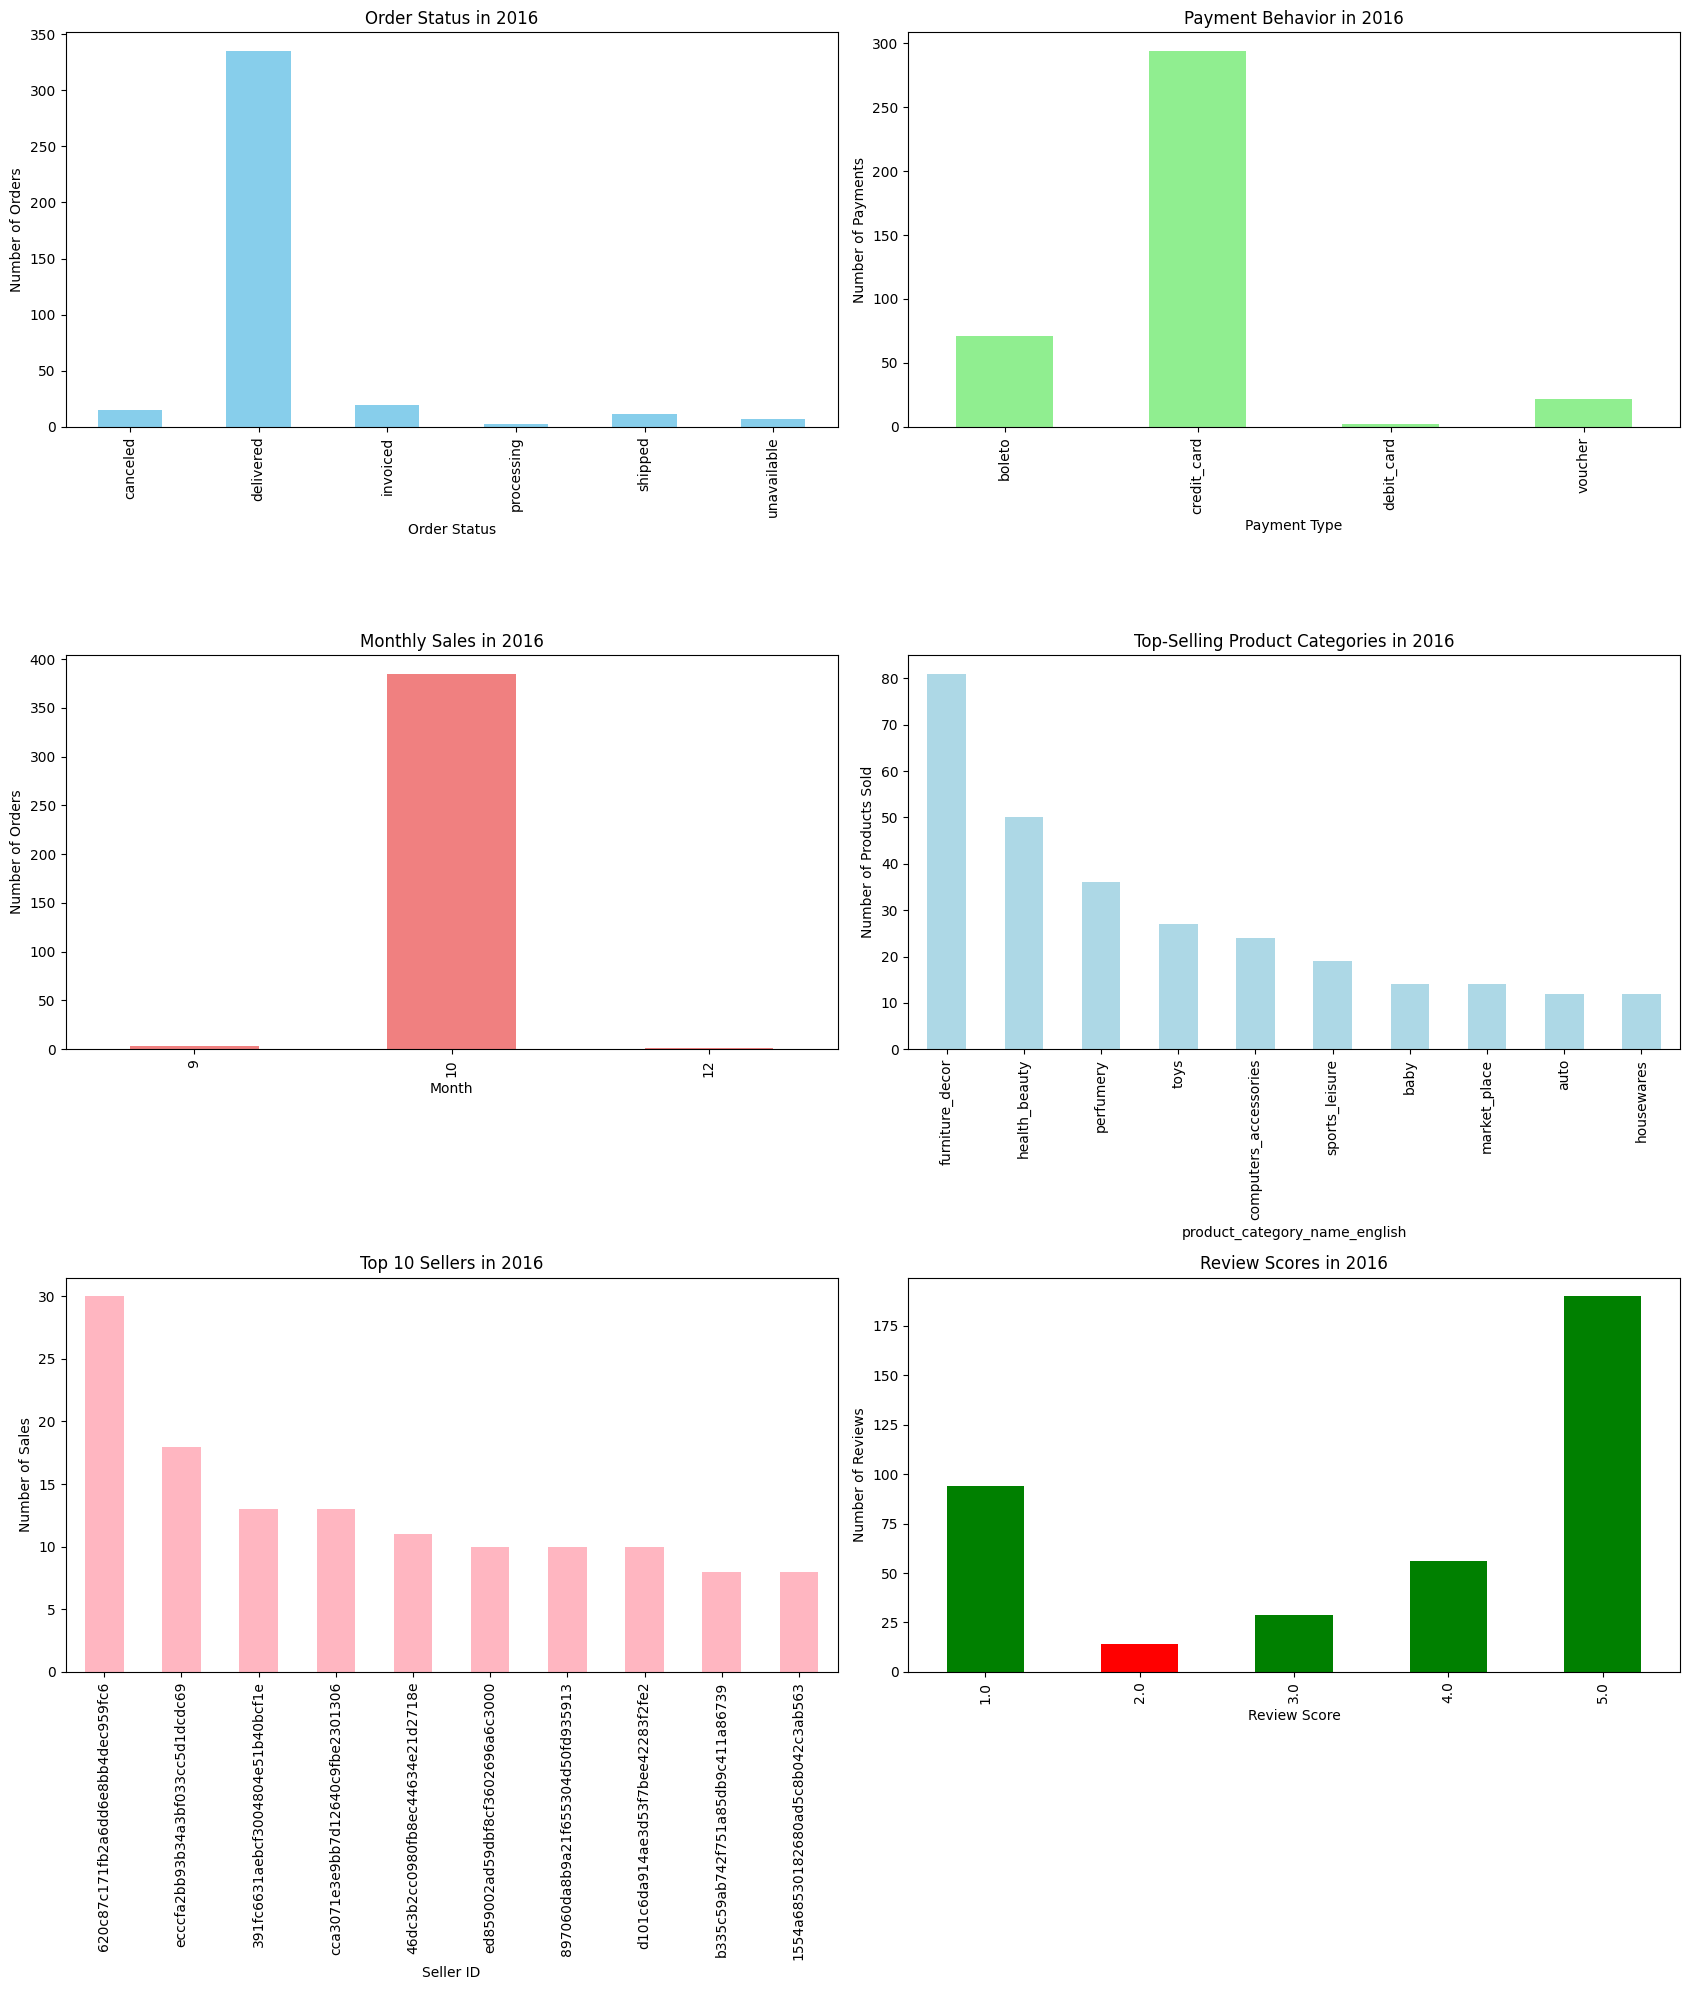

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def analyze_yearly_data(year, df_orders, df_payments, df_items, df_product,df_product_category, df_sellers, df_reviews):
    # Step 1: Merge the datasets
    df_orders_payments = pd.merge(df_orders, df_payments, on='order_id')
    df_merged = pd.merge(df_orders_payments, df_items, on='order_id')
    df_merged = pd.merge(df_merged, df_product, on='product_id', how='left')
    df_merged = pd.merge(df_merged, df_product_category, on='product_category_name', how='left')
    df_merged = pd.merge(df_merged, df_sellers, on='seller_id', how='left')
    df_merged = pd.merge(df_merged, df_reviews, on='order_id', how='left')

    # Step 2: Convert columns to datetime and extract year and month
    df_merged['order_purchase_timestamp'] = pd.to_datetime(df_merged['order_purchase_timestamp'])
    df_merged['year'] = df_merged['order_purchase_timestamp'].dt.year
    df_merged['month'] = df_merged['order_purchase_timestamp'].dt.month

    # Step 3: Filter the data for the specified year
    df_year = df_merged[df_merged['year'] == year]

    # Step 4: Analyze Order Status
    order_status_by_year = df_year.groupby(['order_status']).size()

    # Step 5: Analyze Payment Behavior
    payment_behavior_by_year = df_year.groupby(['payment_type']).size()

    # Step 6: Analyze Monthly Sales Trends
    monthly_sales = df_year.groupby('month').size()

    # Step 7: Analyze Top-Selling Product Categories
    category_sales_by_year = df_year.groupby('product_category_name_english').size().sort_values(ascending=False).head(10)
    # Step 8: Analyze Sellers
    top_sellers_by_year = df_year['seller_id'].value_counts().head(10)

    # Step 9: Analyze Reviews
    review_scores_by_year = df_year.groupby('review_score').size()

    # Step 10: Visualize the results
    plt.figure(figsize=(17, 20))

    plt.subplot(3, 2, 1)
    order_status_by_year.plot(kind='bar', color='skyblue')
    plt.title(f'Order Status in {year}')
    plt.xlabel('Order Status')
    plt.ylabel('Number of Orders')

    plt.subplot(3, 2, 2)
    payment_behavior_by_year.plot(kind='bar', color='lightgreen')
    plt.title(f'Payment Behavior in {year}')
    plt.xlabel('Payment Type')
    plt.ylabel('Number of Payments')

    plt.subplot(3, 2, 3)
    monthly_sales.plot(kind='bar', color='lightcoral')
    plt.title(f'Monthly Sales in {year}')
    plt.xlabel('Month')
    plt.ylabel('Number of Orders')

    plt.subplot(3, 2, 4)
    category_sales_by_year.plot(kind='bar', color='lightblue')
    plt.title(f'Top-Selling Product Categories in {year}')
    plt.xlabel('product_category_name_english')
    plt.ylabel('Number of Products Sold')

    plt.subplot(3, 2, 5)
    top_sellers_by_year.plot(kind='bar', color='lightpink')
    plt.title(f'Top 10 Sellers in {year}')
    plt.xlabel('Seller ID')
    plt.ylabel('Number of Sales')


     # Identify the index of the minimum value
    min_score = review_scores_by_year.idxmin()

    # Assign colors: red for the lowest score, green for others
    colors = ['red' if score == min_score else 'green' for score in review_scores_by_year.index]

    plt.subplot(3, 2, 6)
    review_scores_by_year.plot(kind='bar', color=colors)
    plt.title(f'Review Scores in {year}')
    plt.xlabel('Review Score')
    plt.ylabel('Number of Reviews')

    plt.tight_layout()
    plt.show()

# Example usage: Analyze the year 2017
analyze_yearly_data(2016, df_orders, df_payments, df_items, df_product,df_product_category, df_sellers, df_reviews)


In [26]:
 category_sales_by_year.plot(kind='bar', color='lightblue')
    plt.title(f'Top-Selling Product Categories in {year}')
    plt.xlabel('Product Category')
    plt.ylabel('Number of Products Sold')

IndentationError: unexpected indent (459306646.py, line 2)